## Train CFM

### 1. Forward transport SB1->SB2

In [1]:
import numpy as np
import torch
from DynGenModels.configs.lhco_configs import LHCOlympics_LowLevel_MLP_CondFlowMatch as Configs

configs_fwd = Configs(# data:
                  DATA = 'LHCOlympicsLowLevel',
                  dataset = '../../data/LHCOlympics2020/events_anomalydetection_low_level_ptepm.h5', 
                  features = ['ptj1', 'etaj1', 'phij1', 'mj1', 'ptj2', 'etaj2', 'phij2', 'mj2'], 
                  cuts_sideband_low = {'mjj': [2600, 3200]},  #{'mjj': [2700, 3300]},  
                  cuts_sideband_high = {'mjj': [3800, 4400]}, #{'mjj': [3800, 6000]}, 
                  preprocess = ['normalize', 'logit_transform', 'standardize'],
                  dim_input = 8,
                  num_dijets = 75166,  
                  # training params:   
                  DEVICE = 'cuda:0',
                  EPOCHS = 100,
                  batch_size = 1024,
                  print_epochs = 5,
                  early_stopping = 30,
                  min_epochs = 50,
                  augmented = False,
                  exchange_target_with_source = False,
                  data_split_fracs = [0.85, 0.15, 0.0],
                  lr = 1e-3,
                  optimizer = 'Adam',
                  fix_seed = 12345,
                  # model params:
                  DYNAMICS = 'OptimalTransportFlowMatching', 
                  MODEL = 'MLP_fwd',
                  dim_hidden = 256,
                  dim_time_emb = 64,
                  num_layers = 4,
                  activation = 'GELU',
                  sigma = 0.0,
                  t0 = 0.0,
                  t1 = 1.0,
                  # sampling params:
                  solver = 'midpoint',
                  num_sampling_steps = 1000
                )

configs_fwd.set_workdir(path='../../results', save_config=True)

#================================================================================================================
INFO: created directory: ../../results/LHCOlympicsLowLevel.OptimalTransportFlowMatching.MLP_fwd.2023.12.01_19h47
#================================================================================================================
+-----------------------------+-----------------------------------------------------------------------+
| Parameters                  | Values                                                                |
+-----------------------------+-----------------------------------------------------------------------+
| DATA                        | LHCOlympicsLowLevel                                                   |
| dataset                     | ../../data/LHCOlympics2020/events_anomalydetection_low_level_ptepm.h5 |
| features                    | ['ptj1', 'etaj1', 'phij1', 'mj1', 'ptj2', 'etaj2', 'phij2', 'mj2']    |
| dim_input                   | 8  

2023-12-01 19:47:22.685574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 19:47:23.295267: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Using pt_eta_phi_m coordinates


/home/df630/DynGenModels/src/DynGenModels/datamodules/lhco/datasets.py:151: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:204.)
  dijets = torch.Tensor(f['jet features'])


INFO: building dataloaders...
INFO: train/val/test split ratios: 0.85/0.15/0.0
INFO: train size: 63891, validation size: 11274, testing sizes: 0


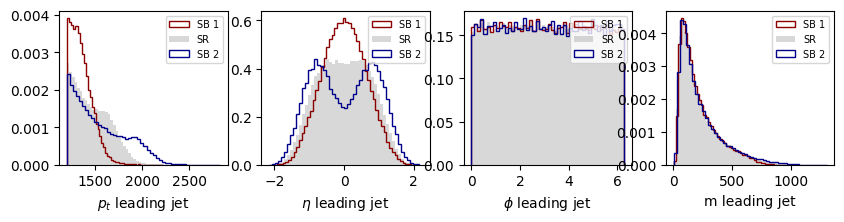

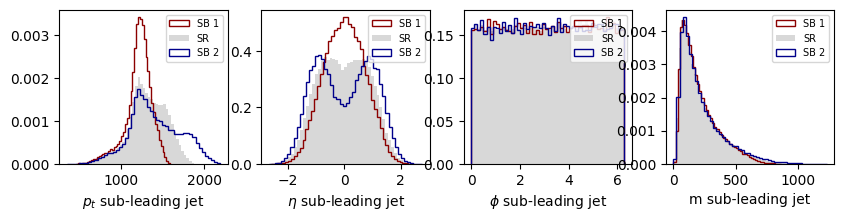

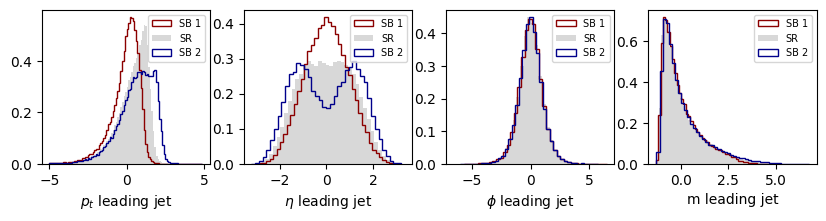

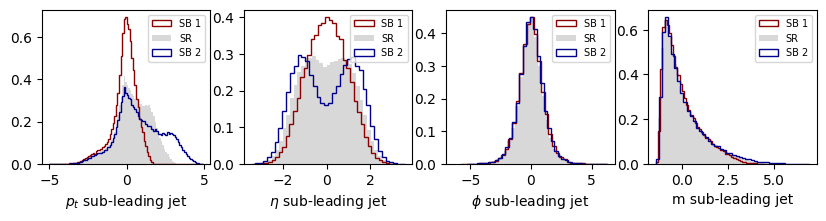

number of training parameters: 267784
start training...


epochs:   0%|          | 0/100 [00:00<?, ?it/s]

	Epoch: 1, train loss: 0.2262644017972644, valid loss: 0.361549686640501  (min valid loss: 0.361549686640501)
	Epoch: 6, train loss: 0.20989261638550533, valid loss: 0.35805935660998023  (min valid loss: 0.35463553170363105)
	Epoch: 11, train loss: 0.20715050517566622, valid loss: 0.34576397140820825  (min valid loss: 0.34576397140820825)
	Epoch: 16, train loss: 0.2044595458677837, valid loss: 0.34215618918339413  (min valid loss: 0.34215618918339413)
	Epoch: 21, train loss: 0.2046199800476195, valid loss: 0.3397994997600714  (min valid loss: 0.3397994997600714)
	Epoch: 26, train loss: 0.2004672970090593, valid loss: 0.3471133833130201  (min valid loss: 0.3397994997600714)
	Epoch: 31, train loss: 0.20041728894861915, valid loss: 0.3483026971419652  (min valid loss: 0.3397994997600714)
	Epoch: 36, train loss: 0.19782961100812943, valid loss: 0.3378490110238393  (min valid loss: 0.3378490110238393)
	Epoch: 41, train loss: 0.19823979456273325, valid loss: 0.3452236118415991  (min valid lo

In [2]:
from DynGenModels.datamodules.lhco.datasets import LHCOlympicsLowLevelDataset
from DynGenModels.datamodules.lhco.dataloader import LHCOlympicsDataLoader 
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching
from DynGenModels.trainer.trainer import DynGenModelTrainer

import torch
import numpy as np
import matplotlib.pyplot as plt

lhco_fwd = LHCOlympicsLowLevelDataset(configs_fwd)
cfm_fwd  = DynGenModelTrainer(dynamics = OptimalTransportFlowMatching(configs_fwd),
                              model = MLP(configs_fwd), 
                              dataloader = LHCOlympicsDataLoader(lhco_fwd, configs_fwd), 
                              configs = configs_fwd)

#...plot data:

from utils import plot_sideband_data

plot_sideband_data(SB1=lhco_fwd.source, 
                   SR=lhco_fwd.background, 
                   SB2=lhco_fwd.target)

plot_sideband_data(SB1=lhco_fwd.source, 
                   SR=lhco_fwd.background, 
                   SB2=lhco_fwd.target,
                   subleading_jet=True)

plot_sideband_data(SB1=lhco_fwd.source_preprocess, 
                   SR=lhco_fwd.background_preprocess, 
                   SB2=lhco_fwd.target_preprocess,
                   bins=(np.arange(-5,5,0.1), 40, 40, 50))

plot_sideband_data(SB1=lhco_fwd.source_preprocess, 
                   SR=lhco_fwd.background_preprocess, 
                   SB2=lhco_fwd.target_preprocess,
                   bins=(np.arange(-5,5,0.1), 40, 40, 50),
                   subleading_jet=True)

#...train model:

cfm_fwd.train()

In [3]:
from utils import plot_interpolation_low_level

def display_low_level_plot_results(configs, lhco, pipeline, mjj_buffer=0., display_intermediate_trajectories=False):

    plot_interpolation_low_level(lhco, pipeline, 
                                input_coords = "pt_eta_phi_m",
                                time_stop_feature='mjj',
                                display_intermediate_trajectories=display_intermediate_trajectories,
                                features=['pt_j1', 'eta_j1', 'phi_j1', 'm_j1'],
                                bins=[(1150, 2500, 20), 
                                    (-2.5, 2.5, 0.075), 
                                    (-0.5, 7, 0.075), 
                                    (0, 1300, 20)], 
                                figsize=(18, 4.5),
                                mass_window=[configs.cuts_sideband_low['mjj'][1] + mjj_buffer, configs.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                                log=False, 
                                density=True,
                                save_path=configs.workdir+'/interpolation_low_level_ptepm_j1.png',
                                show=True)

    plot_interpolation_low_level(lhco, pipeline, 
                                input_coords = "pt_eta_phi_m",
                                time_stop_feature='mjj',
                                display_intermediate_trajectories=display_intermediate_trajectories,
                                features=['pt_j2', 'eta_j2', 'phi_j2', 'm_j2'],
                                bins=[(500, 2500, 20), 
                                    (-2.5, 2.5, 0.075), 
                                    (-0.5, 7, 0.075), 
                                    (0, 1300, 20)],
                                figsize=(18, 4.5),
                                mass_window=[configs.cuts_sideband_low['mjj'][1] + mjj_buffer, configs.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                                log=False, 
                                density=True,
                                save_path=configs.workdir+'/interpolation_low_level_ptepm_j2.png',
                                show=True)

    plot_interpolation_low_level(lhco, pipeline, 
                                input_coords="pt_eta_phi_m",
                                time_stop_feature='mjj',
                                display_intermediate_trajectories=display_intermediate_trajectories,
                                features=['px_j1', 'py_j1', 'pz_j1', 'e_j1'],
                                bins=[(-2000, 2000, 50),
                                    (-2000, 2000, 50), 
                                    (-4000, 4000, 75), 
                                    (1000, 4000, 30)], 
                                figsize=(18, 4.5),
                                mass_window=[configs.cuts_sideband_low['mjj'][1] + mjj_buffer, configs.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                                log=False, 
                                density=True,
                                save_path=configs.workdir+'/interpolation_low_level_pxpypzE_j2.png',
                                show=True)

    plot_interpolation_low_level(lhco, pipeline, 
                                input_coords="pt_eta_phi_m",
                                time_stop_feature='mjj',
                                display_intermediate_trajectories=display_intermediate_trajectories,
                                features=['px_j2', 'py_j2', 'pz_j2', 'e_j2'],
                                bins=[(-2000, 2000, 50),
                                    (-2000, 2000, 50), 
                                    (-4000, 4000, 75), 
                                    (1000, 4000, 30)], 
                                figsize=(18, 4.5),
                                mass_window=[configs.cuts_sideband_low['mjj'][1] + mjj_buffer, configs.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                                log=False, 
                                density=True,
                                save_path=configs.workdir+'/interpolation_low_level_pxpypzE_j2.png',
                                show=True)

    plot_interpolation_low_level(lhco, pipeline, 
                                input_coords="pt_eta_phi_m",
                                time_stop_feature='mjj',
                                display_intermediate_trajectories=display_intermediate_trajectories,
                                features=['mjj', 'delta_Rjj', 'delta_mjj', 'delta_ptjj', 'delta_etajj', 'delta_phijj'],
                                bins=[(configs.cuts_sideband_low['mjj'][0] - mjj_buffer, configs.cuts_sideband_high['mjj'][1] + mjj_buffer, 15), 
                                    (2.5, 4.5, 0.02), 
                                    (-1000, 1000, 10), 
                                    (-1000, 1000, 10), 
                                    (-3, 3, 0.05),
                                    (-3, 3, 0.05)], 
                                figsize=(22, 4.5),
                                mass_window=[configs.cuts_sideband_low['mjj'][1] + mjj_buffer, configs.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                                log=True, 
                                density=True,
                                save_path=configs.workdir+'/interpolation_high_level_dijet.png',
                                show=True)

In [ ]:
# from DynGenModels.configs.lhco_configs import LHCOlympics_LowLevel_MLP_CondFlowMatch as Configs
# from DynGenModels.datamodules.lhco.datasets import LHCOlympicsLowLevelDataset
# from DynGenModels.datamodules.lhco.dataloader import LHCOlympicsDataLoader 
# from DynGenModels.models.deep_nets import MLP
# from DynGenModels.trainer.trainer import DynGenModelTrainer
# from DynGenModels.dynamics.cnf.condflowmatch import SchrodingerBridgeFlowMatching

# model_fwd = '../../results/LHCOlympicsLowLevel.OptimalTransportFlowMatching.MLP_fwd.2023.12.01_18h54'

# configs_fwd = Configs().load(model_fwd + '/config.json')
# configs_fwd.DEVICE = 'cuda:0' 
# configs_fwd.workdir = model_fwd 
# lhco_fwd = LHCOlympicsLowLevelDataset(configs_fwd)
# cfm_fwd  = DynGenModelTrainer(dynamics = SchrodingerBridgeFlowMatching(configs_fwd),
#                               model = MLP(configs_fwd), 
#                               dataloader = LHCOlympicsDataLoader(lhco_fwd , configs_fwd), 
#                               configs = configs_fwd)
# cfm_fwd.load(model='best')

INFO: neural ODE solver with midpoint method and steps=1000


/home/df630/.conda/envs/flow_match_env/lib/python3.9/site-packages/torchdyn/numerics/odeint.py:84: UserWarning: Setting tolerances has no effect on fixed-step methods
  warn("Setting tolerances has no effect on fixed-step methods")
/home/df630/DynGenModels/experiments/LHCO_olympics/utils.py:218: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interpolation_time = round(float(torch.tensor(idx/N)),2)


 interpolation time $t=0.62$


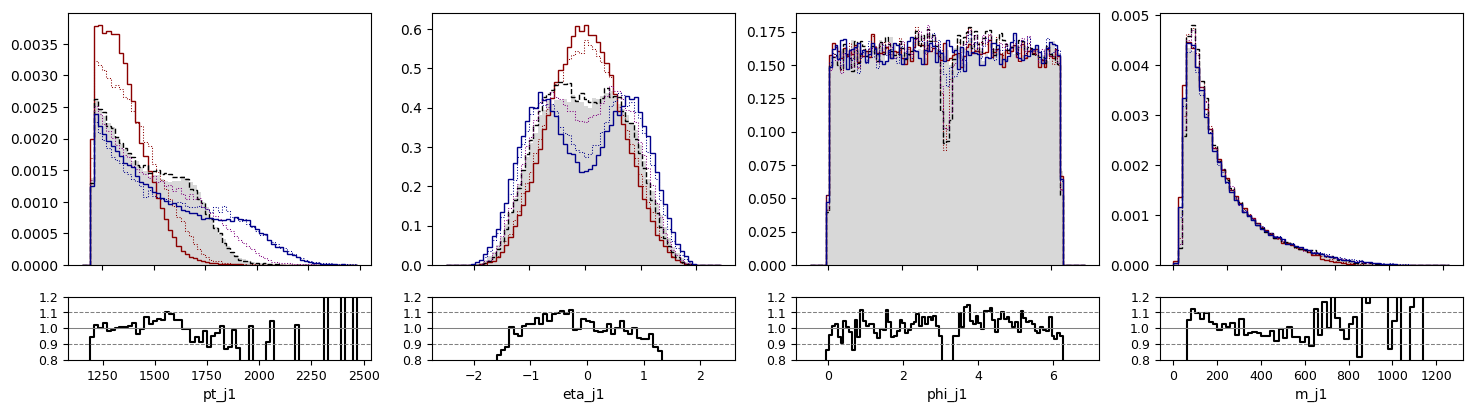

 interpolation time $t=0.62$


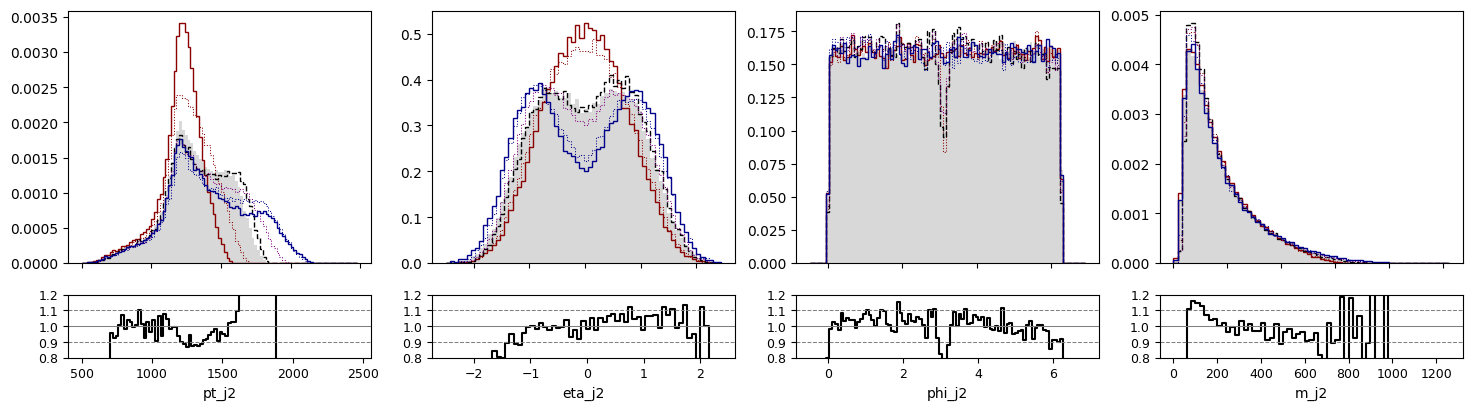

 interpolation time $t=0.62$


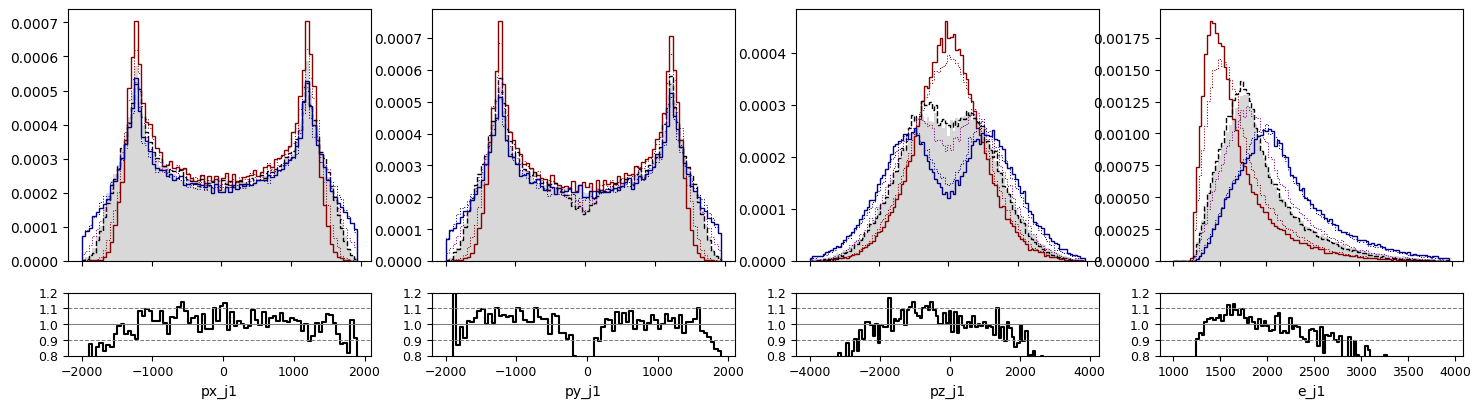

 interpolation time $t=0.62$


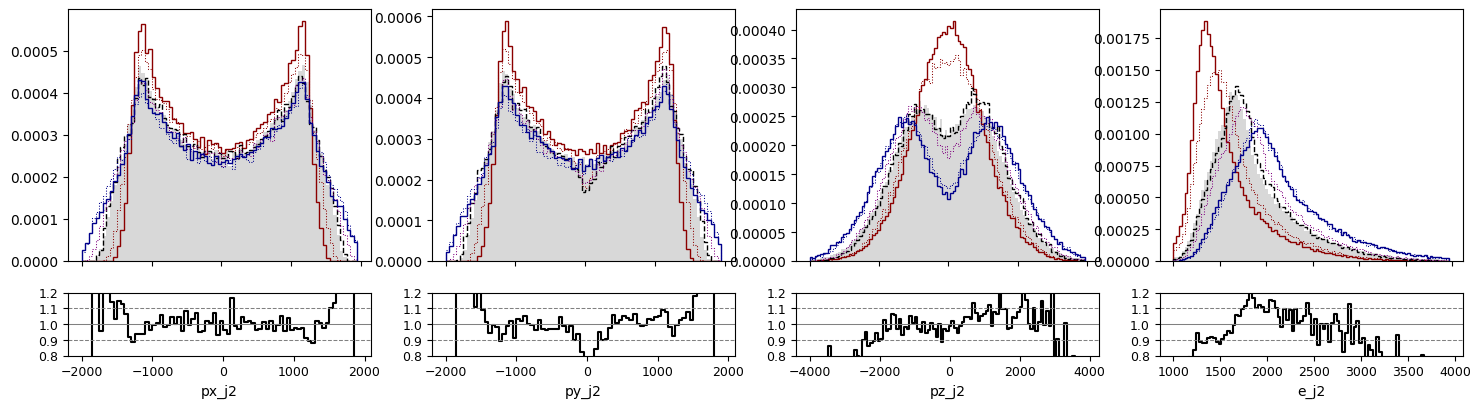

 interpolation time $t=0.62$


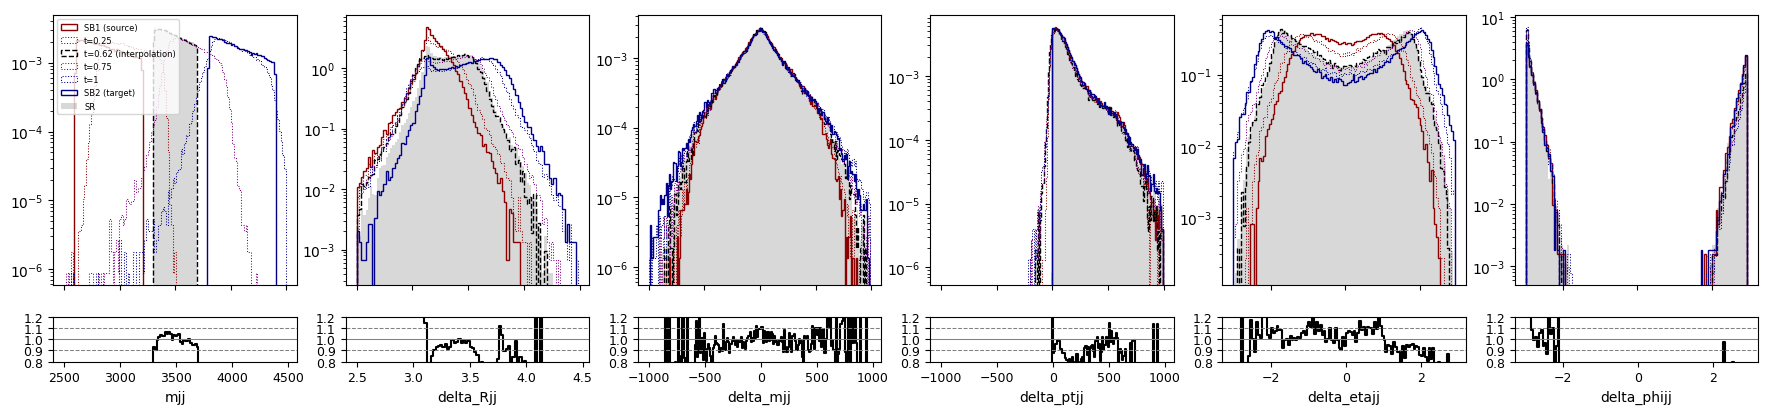

In [4]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from DynGenModels.datamodules.lhco.dataprocess import PreProcessLHCOlympicsLowLevelData, PostProcessLHCOlympicsLowLevelData

pipeline_fwd = FlowMatchPipeline(trained_model=cfm_fwd, 
                                 configs=configs_fwd, 
                                 preprocessor=PreProcessLHCOlympicsLowLevelData,
                                 postprocessor=PostProcessLHCOlympicsLowLevelData,
                                 best_epoch_model=True,
                                 num_sampling_steps=1000)

pipeline_fwd.generate_samples(input_source=lhco_fwd.source)

from utils import display_low_level_plot_results

display_low_level_plot_results(configs_fwd, lhco_fwd, pipeline_fwd, mjj_buffer=100., display_intermediate_trajectories=True)

/tmp/ipykernel_2214280/145053440.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interpolation_time = round(float(torch.tensor(idx_timestep/N)),2)


 interpolation time $t=0.62$


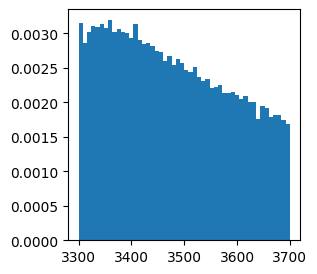

0.62


In [9]:
from utils import get_features

def sample_from_bridge(lhco, 
                       pipeline,
                       features=['pt_j1', 'eta_j1', 'phi_j1', 'm_j1', 'pt_j2', 'eta_j2', 'phi_j2', 'm_j2'],
                       idx_timestep=None, 
                       time_stop_feature = 'mjj',
                       input_coords="pt_eta_phi_m",
                       mass_window=[2700, 3300]
                       ):
    
    N = pipeline.num_sampling_steps

    dic = {'mjj':0, 'delta_Rjj':1, 'delta_mjj':2, 'delta_ptjj':3, 'delta_etajj':4, 'delta_phijj':5,
        'pt_j1':6, 'eta_j1':7, 'phi_j1':8, 'm_j1':9, 'pt_j2':10, 'eta_j2':11, 'phi_j2':12, 'm_j2':13,
        'px_j1':14, 'py_j1':15, 'pz_j1':16, 'e_j1':17, 'px_j2':18, 'py_j2':19, 'pz_j2':20, 'e_j2':21}

    background = get_features(lhco.background, input_coords)
    trajectories = []
    for trajectory in pipeline.trajectories: trajectories.append(get_features(trajectory, input_coords))
    trajectories = torch.stack(trajectories, dim=0)

    if idx_timestep is None: 
        assert time_stop_feature in dic, f'Feature {time_stop_feature} not in {dic.keys()}'
        x = torch.mean(trajectories[...,dic[time_stop_feature]], dim=-1) - background[...,dic[time_stop_feature]].mean()
        idx_timestep = torch.argmin(torch.abs(x))
        interpolation = trajectories[idx_timestep]  

    interpolation_time = round(float(torch.tensor(idx_timestep/N)),2)
    mask = (interpolation[...,0] > mass_window[0]) & (interpolation[...,0] < mass_window[1])
    print(r' interpolation time $t={}$'.format(interpolation_time))
    return interpolation[mask] , interpolation_time

interpolation, interpolation_time = sample_from_bridge(lhco_fwd, 
                                                       pipeline_fwd,
                                                       mass_window=[3300, 3700])

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.hist(interpolation[:,0], bins=50, density=True, label='interpolation')
plt.show()

print(interpolation_time)


In [ ]:
LHCOlympicsLowLevel.OptimalTransportFlowMatching.MLP_fwd.2023.12.01_18h54

### 2. Backward transport SB2->SB1

In [13]:
xx = torch.randn(5,4)

print(xx)

mask = xx[..., 2] < 0
xx[...,2][mask]+=10
print(xx)

tensor([[-0.1084,  0.7013, -1.8811, -0.2089],
        [-1.0958, -0.6645, -0.2403,  1.5121],
        [-0.2192,  0.1614, -1.9919, -1.8750],
        [-0.1540, -2.1573,  0.3590, -0.5730],
        [ 0.4159, -0.8128, -0.4695, -1.3698]])
tensor([[-0.1084,  0.7013,  8.1189, -0.2089],
        [-1.0958, -0.6645,  9.7597,  1.5121],
        [-0.2192,  0.1614,  8.0081, -1.8750],
        [-0.1540, -2.1573,  0.3590, -0.5730],
        [ 0.4159, -0.8128,  9.5305, -1.3698]])


In [ ]:
import numpy as np
import torch
from DynGenModels.configs.lhco_configs import LHCOlympics_LowLevel_MLP_CondFlowMatch as Configs

configs_bwd = Configs(# data:
                  DATA = 'LHCOlympicsLowLevel',
                  dataset = '../../data/LHCOlympics2020/events_anomalydetection_low_level_ptepm.h5', 
                  features = ['ptj1', 'etaj1', 'phij1', 'mj1', 'ptj2', 'etaj2', 'phij2', 'mj2'], 
                  cuts_sideband_low = {'mjj': [2600, 3200]},  #{'mjj': [2700, 3300]},  
                  cuts_sideband_high = {'mjj': [3800, 4400]}, #{'mjj': [3800, 6000]}, 
                  preprocess = ['cosine_transform','standardize'],
                  dim_input = 8,
                  num_dijets = 75166,  
                  # training params:   
                  DEVICE = 'cuda:0',
                  EPOCHS = 20,
                  batch_size = 256,
                  print_epochs = 5,
                  early_stopping = 30,
                  min_epochs = 50,
                  augmented = False,
                  exchange_target_with_source = True,
                  data_split_fracs = [0.85, 0.15, 0.0],
                  lr = 1e-3,
                  optimizer = 'Adam',
                  fix_seed = 12345,
                  # model params:
                  DYNAMICS = 'SchrodingerBridgeFlowMatching', 
                  MODEL = 'MLP_fwd',
                  dim_hidden = 256,
                  dim_time_emb = 64,
                  num_layers = 4,
                  activation = 'ReLU',
                  sigma = 0.0,
                  t0 = 0.0,
                  t1 = 1.0,
                  # sampling params:
                  solver = 'midpoint',
                  num_sampling_steps = 1000
                )

configs_bwd.set_workdir(path='../../results', save_config=True)

In [ ]:
from DynGenModels.datamodules.lhco.datasets import LHCOlympicsLowLevelDataset
from DynGenModels.datamodules.lhco.dataloader import LHCOlympicsDataLoader 
from DynGenModels.models.deep_nets import MLP
from DynGenModels.dynamics.cnf.condflowmatch import SchrodingerBridgeFlowMatching
from DynGenModels.trainer.trainer import DynGenModelTrainer

import torch
import numpy as np
import matplotlib.pyplot as plt

lhco_bwd = LHCOlympicsLowLevelDataset(configs_bwd, exchange_target_with_source=True)
cfm_bwd  = DynGenModelTrainer(dynamics = SchrodingerBridgeFlowMatching(configs_bwd),
                              model = MLP(configs_bwd), 
                              dataloader = LHCOlympicsDataLoader(lhco_bwd, configs_bwd), 
                              configs = configs_bwd)

#...plot data:

from utils import plot_sideband_data

plot_sideband_data(SB1=lhco_bwd.source, 
                   SR=lhco_bwd.background, 
                   SB2=lhco_bwd.target)

plot_sideband_data(SB1=lhco_bwd.source, 
                   SR=lhco_bwd.background, 
                   SB2=lhco_bwd.target,
                   subleading_jet=True)

plot_sideband_data(SB1=lhco_bwd.source_preprocess, 
                   SR=lhco_bwd.background_preprocess, 
                   SB2=lhco_bwd.target_preprocess,
                   bins=(np.arange(-5,5,0.1), 40, 40, 50))

plot_sideband_data(SB1=lhco_bwd.source_preprocess, 
                   SR=lhco_bwd.background_preprocess, 
                   SB2=lhco_bwd.target_preprocess,
                   bins=(np.arange(-5,5,0.1), 40, 40, 50),
                   subleading_jet=True)

#...train model:

cfm_bwd.train()

In [ ]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from DynGenModels.datamodules.lhco.dataprocess import PreProcessLHCOlympicsLowLevelData, PostProcessLHCOlympicsLowLevelData

pipeline_bwd = FlowMatchPipeline(trained_model=cfm_bwd, 
                                 configs=configs_bwd, 
                                 preprocessor=PreProcessLHCOlympicsLowLevelData,
                                 postprocessor=PostProcessLHCOlympicsLowLevelData,
                                 best_epoch_model=True,
                                 num_sampling_steps=1000)

pipeline_bwd.generate_samples(input_source=lhco_bwd.source)

from utils import plot_interpolation_low_level

mjj_buffer = 75.0

plot_interpolation_low_level(lhco_bwd, pipeline_bwd, 
                             input_coords = "pt_eta_phi_m",
                             time_stop_feature='mjj',
                             display_intermediate_trajectories=False,
                             features=['pt_j1', 'eta_j1', 'phi_j1', 'm_j1'],
                             bins=[(1000, 2500, 20), 
                                   (-2.5, 2.5, 0.075), 
                                   (-2.5, 2.5, 0.075), 
                                   (0, 1300, 20)], 
                             figsize=(18, 4.5),
                             mass_window=[configs_bwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_bwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_bwd.workdir+'/interpolation_low_level_ptepm_j1.png',
                             show=True)

plot_interpolation_low_level(lhco_bwd, pipeline_bwd, 
                             input_coords = "pt_eta_phi_m",
                             time_stop_feature='mjj',
                             display_intermediate_trajectories=False,
                             features=['pt_j2', 'eta_j2', 'phi_j2', 'm_j2'],
                             bins=[(500, 2000, 20), 
                                   (-2.5, 2.5, 0.075), 
                                   (-2.5, 2.5, 0.075), 
                                   (0, 1300, 20)],
                             figsize=(18, 4.5),
                             mass_window=[configs_bwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_bwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_bwd.workdir+'/interpolation_low_level_ptepm_j2.png',
                             show=True)

plot_interpolation_low_level(lhco_bwd, pipeline_bwd, 
                             input_coords="pt_eta_phi_m",
                             time_stop_feature='mjj',
                             display_intermediate_trajectories=False,
                             features=['px_j1', 'py_j1', 'pz_j1', 'e_j1'],
                             bins=[(-2000, 2000, 50),
                                   (-2000, 2000, 50), 
                                   (-4000, 4000, 75), 
                                   (1000, 4000, 30)], 
                             figsize=(18, 4.5),
                             mass_window=[configs_bwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_bwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_bwd.workdir+'/interpolation_low_level_pxpypzE_j2.png',
                             show=True)

plot_interpolation_low_level(lhco_bwd, pipeline_bwd, 
                             input_coords="pt_eta_phi_m",
                             time_stop_feature='mjj',
                             display_intermediate_trajectories=False,
                             features=['px_j2', 'py_j2', 'pz_j2', 'e_j2'],
                             bins=[(-2000, 2000, 50),
                                   (-2000, 2000, 50), 
                                   (-4000, 4000, 75), 
                                   (1000, 4000, 30)], 
                             figsize=(18, 4.5),
                             mass_window=[configs_bwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_bwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_bwd.workdir+'/interpolation_low_level_pxpypzE_j2.png',
                             show=True)

plot_interpolation_low_level(lhco_bwd, pipeline_bwd, 
                             input_coords="pt_eta_phi_m",
                             time_stop_feature='mjj',
                             display_intermediate_trajectories=False,
                             features=['mjj', 'delta_Rjj', 'delta_mjj', 'delta_ptjj', 'delta_etajj'],
                             bins=[(configs_bwd.cuts_sideband_low['mjj'][0] - mjj_buffer, configs_bwd.cuts_sideband_high['mjj'][1] + mjj_buffer, 15), 
                                   (2.5, 4.5, 0.02), 
                                   (0, 1000, 10), 
                                   (0, 1000, 10), 
                                   (0, 3, 0.04)], 
                             figsize=(22, 4.5),
                             mass_window=[configs_bwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_bwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_bwd.workdir+'/interpolation_high_level_dijet.png',
                             show=True)



# Sample from Pretrained CFM

Load a previsoiusly trained model that was stored somewhere in a directory. The directory must contain the follwing files:
- `config.json` file with all the parameters used during the training.
- `best_epoch_model.pth` model file corresponding the trained model that had the lowest validation loss.
- `last_epoch_model.pth` model file corresponding the last epoch trained model.


### Load pre-trained model and generate samples

### Optimal Transport

In [ ]:

from DynGenModels.configs.lhco_configs import LHCOlympics_LowLevel_MLP_CondFlowMatch as Configs
from DynGenModels.datamodules.lhco.datasets import LHCOlympicsLowLevelDataset
from DynGenModels.datamodules.lhco.dataloader import LHCOlympicsDataLoader 
from DynGenModels.models.deep_nets import MLP
from DynGenModels.trainer.trainer import DynGenModelTrainer
from DynGenModels.dynamics.cnf.condflowmatch import SchrodingerBridgeFlowMatching

# model_fwd = '../../results/LHCOlympicsLowLevel.SchrodingerBridgeFlowMatching.MLP_forward.2023.11.30_20h12'
# model_fwd = '../../results/LHCOlympicsLowLevel.SchrodingerBridgeFlowMatching.MLP_forward.2023.11.30_22h24'
# model_fwd = '../../results/LHCOlympicsLowLevel.SchrodingerBridgeFlowMatching.MLP_forward.2023.12.01_01h43'
# model_fwd = '../../results/LHCOlympicsLowLevel.SchrodingerBridgeFlowMatching.MLP_forward.2023.12.01_03h41'
model_fwd = '../../results/LHCOlympicsLowLevel.SchrodingerBridgeFlowMatching.MLP_forward.2023.12.01_07h45'

configs_fwd = Configs().load(model_fwd + '/config.json')
configs_fwd.DEVICE = 'cuda:0' 
configs_fwd.workdir = model_fwd 
lhco_fwd = LHCOlympicsLowLevelDataset(configs_fwd)
cfm_fwd  = DynGenModelTrainer(dynamics = SchrodingerBridgeFlowMatching(configs_fwd),
                              model = MLP(configs_fwd), 
                              dataloader = LHCOlympicsDataLoader(lhco_fwd , configs_fwd), 
                              configs = configs_fwd)
cfm_fwd.load(model='best')

In [ ]:
from DynGenModels.pipelines.SamplingPipeline import FlowMatchPipeline 
from DynGenModels.datamodules.lhco.dataprocess import PreProcessLHCOlympicsLowLevelData, PostProcessLHCOlympicsLowLevelData

pipeline_fwd = FlowMatchPipeline(trained_model=cfm_fwd, 
                                configs=configs_fwd, 
                                preprocessor=PreProcessLHCOlympicsLowLevelData,
                                postprocessor=PostProcessLHCOlympicsLowLevelData,
                                num_sampling_steps=1000,
                                best_epoch_model=True)

pipeline_fwd.generate_samples(input_source=lhco_fwd.source)


In [ ]:
from utils import plot_interpolation_low_level

mjj_buffer = 100.0

plot_interpolation_low_level(lhco_fwd, pipeline_fwd, 
                             coords = "pt_eta_phi_m",
                             time_stop_feature='mjj',
                             features=['mjj', 'pt_j1', 'eta_j1', 'phi_j1', 'm_j1'],
                             display_intermediate_trajectories=True,
                             bins=[(configs_fwd.cuts_sideband_low['mjj'][0] - mjj_buffer, configs_fwd.cuts_sideband_high['mjj'][1] + mjj_buffer, 15), (1000, 2500, 20), (-2.5, 2.5, 0.075), (-2.5, 2.5, 0.15), (0, 1300, 20)], 
                             figsize=(22, 4.5),
                             mass_window=[configs_fwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_fwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_fwd.workdir+'/interpolation_low_level_j1.png',
                             show=True)

plot_interpolation_low_level(lhco_fwd, pipeline_fwd, 
                             coords = "pt_eta_phi_m",
                             time_stop_feature='mjj',
                             features=['mjj', 'pt_j2', 'eta_j2', 'phi_j2', 'm_j2'],
                             display_intermediate_trajectories=True,
                             bins=[(configs_fwd.cuts_sideband_low['mjj'][0] - mjj_buffer, configs_fwd.cuts_sideband_high['mjj'][1] + mjj_buffer, 15), (500, 2000, 20), (-2.5, 2.5, 0.075), (-2.5, 2.5, 0.15), (0, 1300, 20)],
                             figsize=(22, 4.5),
                             mass_window=[configs_fwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_fwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_fwd.workdir+'/interpolation_low_level_j2.png',
                             show=True)

plot_interpolation_low_level(lhco_fwd, pipeline_fwd, 
                             coords="pt_eta_phi_m",
                             time_stop_feature='mjj',
                             features=['mjj', 'delta_Rjj', 'delta_mjj', 'delta_ptjj', 'delta_etajj'],
                             display_intermediate_trajectories=True,
                             bins=[(configs_fwd.cuts_sideband_low['mjj'][0] - mjj_buffer, configs_fwd.cuts_sideband_high['mjj'][1] + mjj_buffer, 15), (2.5, 4.5, 0.02), (0, 1000, 10), (0, 1000, 10), (0, 3, 0.04)], 
                             figsize=(22, 4.5),
                             mass_window=[configs_fwd.cuts_sideband_low['mjj'][1] + mjj_buffer, configs_fwd.cuts_sideband_high['mjj'][0] - mjj_buffer], 
                             log=False, 
                             density=True,
                             save_path=configs_fwd.workdir+'/interpolation_high_level_dijet.png',
                             show=True)

In [ ]:
from utils import load_bridge_pipelines
from DynGenModels.dynamics.cnf.condflowmatch import OptimalTransportFlowMatching

model_fwd = '../../results/LHCOlympicsLowLevel.OptimalTransportFlowMatching.MLP_forward.2023.11.27_12h18'

pipe_fwd, pipe_bwd, lhco_fwd, lhco_bwd = load_bridge_pipelines(bridge=OptimalTransportFlowMatching,
                                                               model_fwd=model_fwd, 
                                                               model_bwd=None, 
                                                               device='cuda:1')


In [ ]:
from utils import plot_interpolation_combined, plot_interpolation_combined_corner, plot_marginal_fits_corner

plot_interpolation_combined(lhco_fwd, pipe_fwd, pipe_bwd, figsize=(18, 4.5),
                            mass_window=[3300, 3700], 
                            bins=[(2500, 7500, 40), (0, 1000, 15), (-1000, 1000, 20), (0, 1, 0.01), (0, 1., 0.01)], 
                            log=True, 
                            density=True,
                            save_path_fwd=model_fwd + '/interpolation_combined.png',
                            save_path_bwd=model_bwd + '/interpolation_combined.png')

plot_interpolation_combined_corner(lhco_fwd, pipe_fwd, pipe_bwd, figsize=(13,13),
                                    mass_window=[3300, 3700], 
                                    bins=[(3000, 4000, 20), (0, 750, 12), (-1000, 1000, 20), (-0.2, 1.2, 0.02), (-0.2, 1.2, 0.02)], 
                                    log=False, 
                                    density=True,
                                    save_path_fwd=model_fwd + '/interpolation_corner_plot.pdf',
                                    save_path_bwd=model_bwd + '/interpolation_corner_plot.pdf')

plot_marginal_fits_corner(lhco_fwd, pipe_fwd, pipe_bwd, figsize=(13,13),
                            mass_window=[3300, 3700], 
                            bins=[(2500, 6500, 40), (0, 750, 12), (-1000, 1000, 20), (-0.2, 1.2, 0.02), (-0.2, 1.2, 0.02)], 
                            log=False, 
                            density=True,
                            save_path_fwd=model_fwd + '/marginals_corner_plots.pdf',
                            save_path_bwd=model_bwd + '/marginals_corner_plots.pdf')